# FITS Noise Reduction

## Author: Tanmoy Bhowmik
## Required dependencies
* Python modules
* python 3
* astropy
* numpy
* matplotlib
* scipy
* scikit-image or skimage

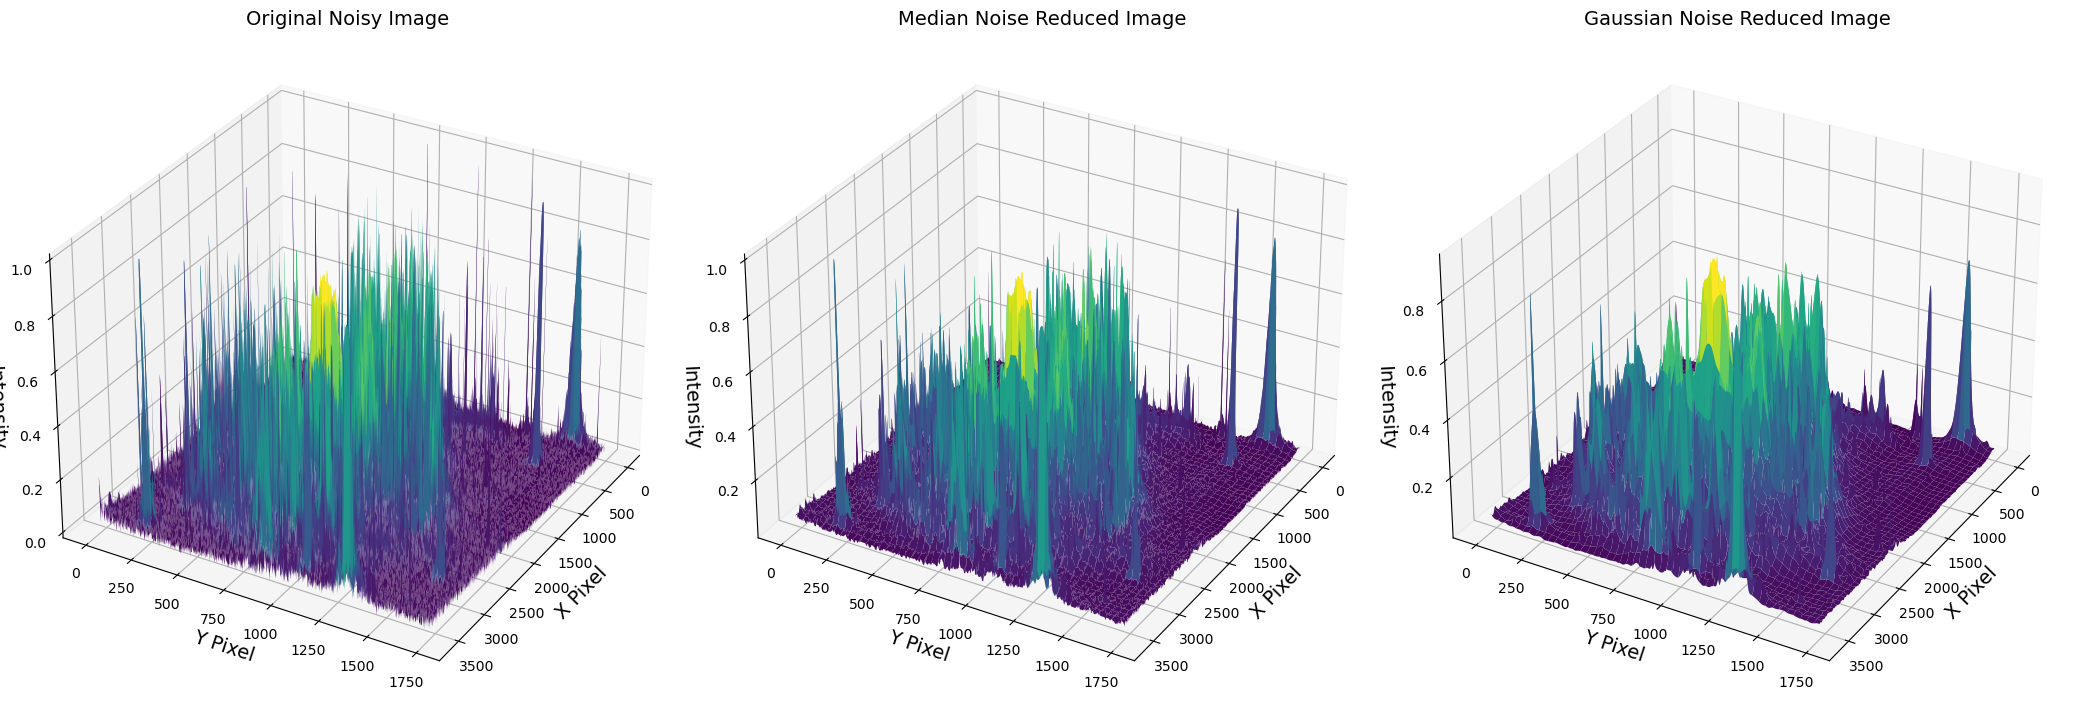

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits
from scipy.ndimage import gaussian_filter, median_filter

# Load the FITS file
fits_file_path = 'n2207_OPT_G.fits'  # Path to your FITS file
with fits.open(fits_file_path) as hdul:
    # Assuming the image is in the first HDU (Header Data Unit)
    original_image = hdul[0].data

# Check if the image is loaded correctly
if original_image is None:
    raise ValueError("Image data could not be loaded from the FITS file.")

# Normalize the image data to the range [0, 1] for visualization
original_image_normalized = (original_image - np.min(original_image)) / (np.max(original_image) - np.min(original_image))

# Create a noise-reduced image using Gaussian filtering
gaussian_reduced_image = gaussian_filter(original_image_normalized, sigma=8)

# Create a noise-reduced image using Median filtering
median_reduced_image = median_filter(original_image_normalized, size=10)  # size can be adjusted

# Set up the figure
fig = plt.figure(figsize=(21, 7))

# Plotting the original noisy image
ax1 = fig.add_subplot(131, projection='3d')
x = np.arange(original_image_normalized.shape[1])
y = np.arange(original_image_normalized.shape[0])
x, y = np.meshgrid(x, y)
ax1.plot_surface(x, y, original_image_normalized, cmap='viridis', edgecolor='none')
ax1.set_title('Original Noisy Image',fontsize=14)
ax1.set_xlabel('X Pixel',fontsize=14)
ax1.set_ylabel('Y Pixel',fontsize=14)
ax1.set_zlabel('Intensity',fontsize=14)
ax1.view_init(elev=30, azim=30)  # Adjust the view angle


# Plotting the Median noise-reduced image
ax3 = fig.add_subplot(132, projection='3d')
ax3.plot_surface(x, y, median_reduced_image, cmap='viridis', edgecolor='none')
ax3.set_title('Median Noise Reduced Image',fontsize=14)
ax3.set_xlabel('X Pixel',fontsize=14)
ax3.set_ylabel('Y Pixel',fontsize=14)
ax3.set_zlabel('Intensity',fontsize=14)
ax3.view_init(elev=30, azim=30)  # Adjust the view angle

# Plotting the Gaussian noise-reduced image
ax2 = fig.add_subplot(133, projection='3d')
ax2.plot_surface(x, y, gaussian_reduced_image, cmap='viridis', edgecolor='none')
ax2.set_title('Gaussian Noise Reduced Image',fontsize=14)
ax2.set_xlabel('X Pixel',fontsize=14)
ax2.set_ylabel('Y Pixel',fontsize=14)
ax2.set_zlabel('Intensity',fontsize=14)
ax2.view_init(elev=30, azim=30)  # Adjust the view angle

# Show the plots
plt.tight_layout()
plt.show()
